In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [207]:
# Generate sample data

df = pd.read_csv('data/classification_dataset.csv')




In [208]:
# transpose the dataframe to see the whole data at once
# df.head().T

In [209]:
# data cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    



In [210]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [211]:

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')


In [212]:
df.totalcharges = df.totalcharges.fillna(0)

df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [213]:

# replace target variable with binary values
df.churn  = (df.churn == 'yes').astype(int) 



In [214]:
# SETTING UP THE VALIDATION FRAMEWORK

# perform the train-test split with scikit-learn
# what is skit-learn?   
from sklearn.model_selection import train_test_split




In [215]:
# train_test_split splits data into train and test sets

df_full_train, df_test =  train_test_split(df, test_size=0.2, random_state=1)

len(df_full_train), len(df_test)

(5634, 1409)

In [216]:
# get validation dataset

df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)


(4225, 1409, 1409)

In [217]:
# make indices not to be shuffles

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [218]:
# get target variable
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [219]:
# delete target variable from dataframes

del df_train['churn']
del df_val['churn']
del df_test['churn']


In [220]:
# EDA

# checking missing values
# look at the target variable (churn) distribution
# look at numerical and categorical variables






In [221]:
df_full_train = df_full_train.reset_index(drop=True)



In [222]:
# check missing values

df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [223]:
df_full_train.churn.value_counts(normalize=True)

# churn rate : the rate at which customers leave a service

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [224]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [225]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [226]:
# numerical columns

numerical = ['tenure', 'monthlycharges', 'totalcharges']


In [227]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [228]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [229]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [230]:
df_full_train[numerical].nunique()

tenure              73
monthlycharges    1494
totalcharges      5291
dtype: int64

In [231]:
# FEATURE IMPORTANCE: CHURN RATE AND RISK RATIO

# CHURN RATE
# RISK  RATIO
# MUTUTAL INFORMATION





In [232]:
# CHURN RATE

churn_female =  df_full_train[df_full_train.gender == 'female'].churn.mean()

churn_female

0.27682403433476394

In [233]:
churn_male =  df_full_train[df_full_train.gender == 'male'].churn.mean()

churn_male

0.2632135306553911

In [234]:
churn_partner =  df_full_train[df_full_train.partner == 'yes'].churn.mean()

churn_partner

0.20503330866025166

In [235]:
churn_no_partner =  df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [236]:
global_churn = df_full_train.churn.mean()

global_churn

0.26996805111821087

In [237]:
churn_female_difference = global_churn - churn_female
churn_male_difference = global_churn - churn_male


# partner

churn_partner_difference = global_churn - churn_partner

churn_no_partner_difference = global_churn - churn_no_partner


print(churn_female_difference)
print(churn_male_difference)


# partner
print(churn_partner_difference)
print(churn_no_partner_difference)

-0.006855983216553063
0.006754520462819769
0.06493474245795922
-0.05984095297455855


In [238]:
# RISK RATIO

churn_no_partner / global_churn

1.2216593879412643

In [239]:
churn_partner / global_churn

0.7594724924338315

In [240]:
from IPython.display import display

In [241]:
# we cannot individually calculate risk ratio for all categorical variables
# so we can leverage on sql like groupby functionality of pandas

# SELECT gender, AVG(churn), AVG(churn), AVG(churn) - global_churn as diff, AVG(churn) / global_churn as risk_ratio FROM data GROUP BY gender

df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk_ratio'] = df_group['mean'] / global_churn
df_group

for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk_ratio'] = df_group['mean'] / global_churn
    print(f'\nColumn: {col}')
    display(df_group)





Column: gender


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



Column: seniorcitizen


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



Column: partner


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



Column: dependents


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



Column: phoneservice


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



Column: multiplelines


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



Column: internetservice


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



Column: onlinesecurity


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



Column: onlinebackup


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



Column: deviceprotection


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



Column: techsupport


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



Column: streamingtv


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



Column: streamingmovies


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



Column: contract


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



Column: paperlessbilling


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



Column: paymentmethod


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [242]:
# Feature importance : Mutual Information

# concept from information theory that tells us how much information about one variable can be obtained by observing another variable

from sklearn.metrics import mutual_info_score

# mutual_info_score helps us to compute mutual information between two discrete variables
# comparing churn dataset with contract type

mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [243]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [244]:
df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [245]:
# Feature correlation 
# Mutual information : a way to measure importance of categorical features
# correlation : a way to measure importance of numerical features

# what is correlation?

# A way to measure importance of numerical features is to calculate their correlation with the target variable



In [246]:
df_full_train[numerical].corrwith(df_full_train.churn)

# df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [247]:
# one-hot encoding
# use scikit-learn's to encode categorical variables


from sklearn.feature_extraction import DictVectorizer

In [248]:
train_dicts = (df_train[categorical + numerical].to_dict(orient='records'))


In [249]:


dv = DictVectorizer(sparse=False)

In [250]:
# get feature names: dv.get_feature_names_out()
x_train = dv.fit_transform(train_dicts)




In [251]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)


In [252]:
# test_dicts = df_test[categorical + numerical].to_dict(orient='records')
# x_test = dv.transform(test_dicts)

In [ ]:
# Logistic regression model

from sklearn.linear_model import LogisticRegression

In [254]:
# Train the model

model = LogisticRegression()

model.fit(x_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score


In [256]:
y_pred = model.predict_proba(x_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()  # accuracy

0.8019872249822569

In [257]:
accuracy_score(y_val, y_pred >= 0.5)

0.8019872249822569

In [258]:
# Accuracy
# correct predictions / total predictions

(y_val == churn_decision).sum() / len(y_val)

0.8019872249822569

In [259]:
# evaluate prediction for different thresholds i.e from 0 to 21 
thresholds = np.linspace(0, 1, 21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, (y_pred >= t).astype(int))
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.505
0.10 0.591
0.15 0.665
0.20 0.709
0.25 0.740
0.30 0.762
0.35 0.770
0.40 0.786
0.45 0.793
0.50 0.802
0.55 0.801
0.60 0.796
0.65 0.784
0.70 0.764
0.75 0.744
0.80 0.732
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


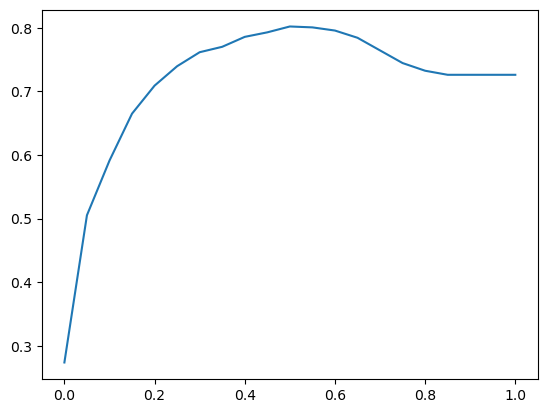

In [260]:
plt.plot(thresholds, scores)

In [261]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 1409})

In [262]:
#CONFUSION TABLE
# A way of looking at error and prediction scores
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [263]:
t = 0.5
predicted_positive = (y_pred >= t)
predictive_negative = (y_pred < t)

In [264]:
tp = (predicted_positive & actual_positive).sum()
tn = (predictive_negative & actual_negative).sum()

In [265]:
fp = (predicted_positive & actual_negative).sum()
fn = (predictive_negative & actual_positive).sum()
fp, fn

(103, 176)

In [266]:
confusion_matrix = np.array([[tn, fp], [fn, tp]])

(confusion_matrix  / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [267]:
(tp + tn) / (tp + tn + fp + fn)  # accuracy

0.8019872249822569

In [268]:
# PRECISION

# TELL USE THE FRACTION OF POSITIVE PREDICTIONS THAT ARE CORRECT

p = tp / (tp + fp)


p

0.670926517571885

In [269]:
# RECALL
# TELL US THE FRACTION OF ACTUAL POSITIVES THAT ARE CORRECTLY IDENTIFIED BY THE MODEL 

r = tp / (tp + fn)

r

0.5440414507772021

In [270]:
# ROC CURVE AND AUC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)


Text(0, 0.5, 'True Positive Rate as TPR')

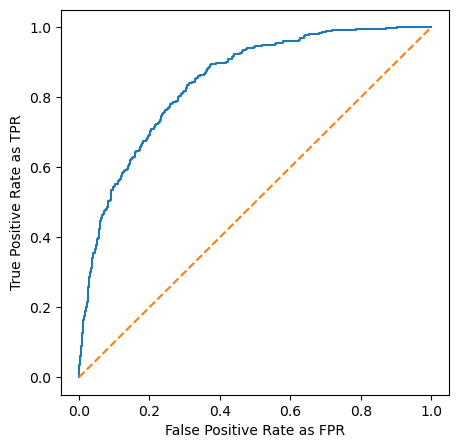

In [271]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('False Positive Rate as FPR')
plt.ylabel('True Positive Rate as TPR')

In [272]:
# calculate AUC

from sklearn.metrics import auc

In [273]:
auc_value = auc(fpr, tpr)

auc_value

0.8436377817958964

In [274]:
from sklearn.metrics import roc_auc_score   
roc_auc_score(y_val, y_pred)

0.8436377817958964

In [275]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]


In [276]:
import random

In [277]:
n = 100000
success = 0
for i in range(n):
    pos_index = random.randint(0, len(pos) - 1)
    neg_index = random.randint(0, len(neg) - 1)
    
    if pos[pos_index] > neg[neg_index]:
        success = success + 1

success / n

0.84255

In [278]:
n = 500000

np.random.seed(1)
pos_index = np.random.randint(0, len(pos), size=n)
neg_index = np.random.randint(0, len(neg), size=n)


In [279]:
(pos[pos_index] > neg[neg_index]).mean()

0.843458

In [280]:
# CROSS VALIDATION: A WAY TO ESTIMATE MODEL PERFORMANCE ON DIFFERENT DATASETS
# K-FOLD CROSS VALIDATION
# Evaluating the same model on different subset  of data
# Getting the average prediction and the spread within the predictions


def train(df_train, y_train, C=1.0):
    
    dicts = (df_train[categorical + numerical].to_dict(orient='records'))
    
    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(x_train, y_train)
    return dv, model




In [281]:
dv, model = train(df_train,y_train, C=0.001)


In [282]:
def predict(df, dv, model):
    dicts = (df[categorical + numerical].to_dict(orient='records'))
    x = dv.transform(dicts)
    y_pred = model.predict_proba(x)[:, 1]
    return y_pred

In [283]:
y_pred = predict(df_val, dv, model)

In [284]:
from sklearn.model_selection import KFold

In [285]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [286]:
from tqdm import tqdm

In [287]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    for train_idx, val_idx  in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_full_train.churn.iloc[train_idx].values
        y_val = df_full_train.churn.iloc[val_idx].values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


 14%|█▍        | 1/7 [00:02<00:14,  2.38s/it]

C=0.001 0.825 +- 0.009


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=0.01 0.840 +- 0.009


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=0.1 0.842 +- 0.007


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=0.5 0.842 +- 0.007


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=1 0.842 +- 0.007


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=5 0.842 +- 0.007


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C=10 0.842 +- 0.007


In [288]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.842 +- 0.007


In [289]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)

auc

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8583950837964618

In [290]:
# when to use cross validation?
# when u have small dataset

In [291]:
# Save the model with Pickle, what is pickle?

import pickle

In [292]:
output_file = f'model_C={C}.bin'
output_file

'model_C=10.bin'

In [293]:
#save our model and save it to a file

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)
    # do stuff
    
# do other stuff

In [294]:
#Load the model from the file

with open(output_file, 'rb') as f_in:
    dv,  model =    pickle.load(f_in)

In [303]:
customer = {
    'gender' : 'female',
    'seniorcitizen' : 0,
    'partner' : 'yes',
    'dependents' : 'no',
    'phoneservice' : 'no',
    'multiplelines' : 'no_phone_service',
    'internetservice' : 'dsl',
    'onlinesecurity' : 'no',
    'onlinebackup' : 'yes',
    'deviceprotection' : 'no',
    'techsupport' : 'no',
    'streamingtv' : 'no',
    'streamingmovies' : 'no',
    'contract' : 'month-to-month',
    'paperlessbilling' : 'yes',
    'paymentmethod' : 'electronic_check',
    'tenure' : 1,
    'monthlycharges' : 29.85,
    'totalcharges' : 29.85
}

In [304]:
X  = dv.transform([customer])


In [305]:
model.predict_proba(X)[0, 1]

0.6274102629636127